# The numpy gradient method

Here we look the numpy gradient method and explain the mathematics behind it. The situation is that we have a function known at discrete points. The gradient method will approximate the "derivative" of this function. The simpler situation is where the points are evenly spaced as illustrated by the first graph, but the gradient method can handle irregularly spaced points as well as in the second graph: 

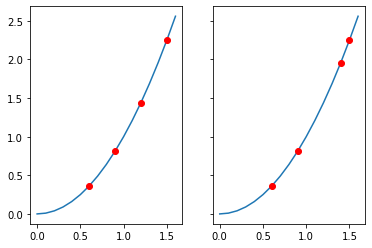

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,1.7,0.1)
y = x*x

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.plot([0.6,0.9,1.2,1.5],[0.36,.81,1.44, 2.25],'ro')

ax2.plot(x, y)
ax2.plot([0.6,0.9,1.4,1.5],[0.36,.81,1.96,2.25],'ro')

The starting point is the Taylor series approximation formula. For a $C^2$ continuous function:

$$f(x+h)=f(x)+f^{\prime}(x)h+f^{\prime\prime}(\xi)\frac{h^{2}}{2},\qquad\xi\in(x,x+h).$$

We may solve for $f^\prime(x)$ and obtain the first order approximation
$$
f^{\prime}(x)=\frac{f(x+h)-f(x)}{h}+O(h).
$$
Can we do better than this? Yes indeed. 

We assume that the function $C^3$. The Taylor series theorem than gives us
$$
f(x+h)=f(x)+f^{\prime}(x)h+f^{\prime\prime}(x)\frac{h^{2}}{2}+f^{\prime\prime\prime}(\xi_{+})\frac{h^{3}}{6}
$$
We also have the formula replacing $h$ with $-h$:
$$
f(x-h)=f(x)-f^{\prime}(x)h+f^{\prime\prime}(x)\frac{h^{2}}{2}-f^{\prime\prime\prime}(\xi_{-})\frac{h^{3}}{6}
$$
Subtracting these two formulas a a miracle happens, the $f(x)$ term _and_ the $f^{\prime\prime}(x)$ terms vanish. Again we solve for $f^{\prime}(x)$ to find:
$$
f^{\prime}(x)=\frac{f(x+h)-f(x-h)}{2h}+\left(f^{\prime\prime\prime}(\xi_{+})+f^{\prime\prime\prime}(\xi_{-})\right)\frac{h^{2}}{12}
$$
or 
$$
f^{\prime}(x)=\frac{f(x+h)-f(x-h)}{2h}+O(h^{2})
$$

Let us try this out manually. We assume a function on a uniformly intervals, say customers visiting a small shop on given days. Suppose $f(0)=3,f(1)=6,f(2)